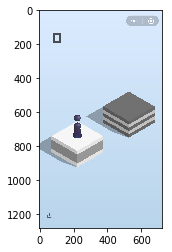

In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
im = Image.open('./autojump.png')
im_pixel = im.load()
w, h = im.size
DEBUG_COLOR_RED = (200, 0, 0, 255)
DEBUG_COLOR_GREEN = (0, 200, 0, 255)

imshow(np.asarray(im))

In [2]:
scan_start_y = 0
for i in range(int(h / 3), int(h*2 / 3), 50):
    last_pixel = im_pixel[0, i]
    for j in range(1, w):
        pixel = im_pixel[j, i]
        # 不是纯色的线，则记录 scan_start_y 的值，准备跳出循环
        if pixel != last_pixel:
            scan_start_y = i - 50
            break
    if scan_start_y:
            break
print('scan_start_y: {}'.format(scan_start_y))

scan_start_y: 476


start center point: (225, 739)


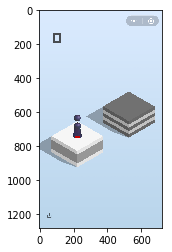

In [3]:
scan_x_border = int(w / 8)  # 扫描棋子时的左右边界
piece_x_sum = 0
piece_x_c = 0
piece_y_max = 0
piece_base_height_1_2 = 13

for y in range(scan_start_y, int(h * 2 / 3)):
    # 横坐标方面减少了一部分扫描开销
    for x in range(scan_x_border, w - scan_x_border):
        pixel = im_pixel[x, y]
        # 根据棋子的最低几行的颜色判断，找最后一行那些点的平均值
        if (50 < pixel[0] < 60) \
                and (53 < pixel[1] < 63) \
                and (95 < pixel[2] < 110):
            piece_x_sum += x
            piece_x_c += 1
            piece_y_max = max(y, piece_y_max)
            im.putpixel((x, y), DEBUG_COLOR_RED)

piece_x = int(piece_x_sum / piece_x_c)
piece_y = piece_y_max - piece_base_height_1_2  # 上移一点距离
im.putpixel((piece_x, piece_y), DEBUG_COLOR_GREEN)
imshow(np.asarray(im))
print("start center point: ({}, {})".format(piece_x, piece_y))

In [4]:
board_x = 0
board_y = 0
piece_body_width = 47

if piece_x < w/2:
    board_x_start = piece_x
    board_x_end = w
else:
    board_x_start = 0
    board_x_end = piece_x

#for x in range(0, w):
#    im.putpixel((x, int(h*2/3)), DEBUG_COLOR_RED)
    
#for x in range(0, w):
#    im.putpixel((x, int(h/3)), DEBUG_COLOR_RED)
    
    
#for y in range(0, h):
#    im.putpixel((board_x_start, y), DEBUG_COLOR_GREEN)
    
#for y in range(0, h):
#    im.putpixel((board_x_end-1, y), DEBUG_COLOR_GREEN)   
    
    
for y in range(int(h / 3), int(h * 2 / 3)):
    last_pixel = im_pixel[0, y]
    if board_x or board_y:
        break
    board_x_sum = 0
    board_x_c = 0
    
    for x in range(int(board_x_start), int(board_x_end)):
        pixel = im_pixel[x, y]
        # 修掉脑袋比下一个小格子还高的情况的 bug
        if abs(x - piece_x) < piece_body_width:
            continue
            
        # 这个颜色判断应该 OK，暂时不提出来
        if abs(pixel[0] - last_pixel[0]) \
                + abs(pixel[1] - last_pixel[1]) \
                + abs(pixel[2] - last_pixel[2]) > 10:
            # print("x, y: {}, {}".format(x, y))
            im.putpixel((x, y), DEBUG_COLOR_RED) 
            board_x_sum += x
            board_x_c += 1
    if board_x_sum:
        board_x = (int) (board_x_sum / board_x_c)
last_pixel = im_pixel[board_x, y]


# 从上顶点往下 +274 的位置开始向上找颜色与上顶点一样的点，为下顶点
# 该方法对所有纯色平面和部分非纯色平面有效，对高尔夫草坪面、木纹桌面、
# 药瓶和非菱形的碟机（好像是）会判断错误
for k in range(y+274, y, -1):  # 274 取开局时最大的方块的上下顶点距离
    pixel = im_pixel[board_x, k]
    if abs(pixel[0] - last_pixel[0]) \
            + abs(pixel[1] - last_pixel[1]) \
            + abs(pixel[2] - last_pixel[2]) < 10:
        print("({}, {})".format(board_x, k))
        im.putpixel((board_x, k), DEBUG_COLOR_RED) 
        break
board_y = int((y+k) / 2)

# 如果上一跳命中中间，则下个目标中心会出现 r245 g245 b245 的点，利用这个
# 属性弥补上一段代码可能存在的判断错误
# 若上一跳由于某种原因没有跳到正中间，而下一跳恰好有无法正确识别花纹，则有
# 可能游戏失败，由于花纹面积通常比较大，失败概率较低
for j in range(i, i+200):
    pixel = im_pixel[board_x, j]
    if abs(pixel[0] - 245) + abs(pixel[1] - 245) + abs(pixel[2] - 245) == 0:
        board_y = j + 10
        break

print("board center: ({}, {})".format(board_x, board_y))
im.putpixel((board_x, board_y), DEBUG_COLOR_RED)        
# imshow(np.asarray(im))

(525, 652)
board center: (525, 566)


In [5]:
# im.show()